<a href="https://colab.research.google.com/github/Lisker2/ML/blob/main/simple_implementation/QLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gymnasium
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import gymnasium as gym
from pyvirtualdisplay import Display

In [ ]:
class Cart_Pole:

  def __init__(self, bounds = np.array([2.4, 3, 0.418, 3]), steps = np.array([4, 10, 30, 10]), 
               num_time_steps = 5000, gamma = 1, epsilon = 0.1, alpha = 1):
    
    self.action = 2
    self.n = 4
    self.bounds = bounds
    self.steps = steps
    self.num_time_steps = num_time_steps
    self.gamma = gamma
    self.epsilon = epsilon
    self.alpha = alpha
    # Intervals of states
    self.bins = [np.linspace(-self.bounds[i], self.bounds[i], self.steps[i]) for i in range(self.n)]
    # Initialize the Q table (4, 10, 30, 10, 2) in the example. 
    self.Q = np.random.rand(steps[0], steps[1], steps[2], steps[3], 2)
    self.rewards = []

  def cal_state(self, observation):
    # Return the state based on the observation, for example, (4, 5, 15, 5).
    return [np.digitize(observation[i], self.bins[i]) - 1 for i in range(self.n)]
  
  def qlearning(self):

    env = gym.make("CartPole-v1", render_mode="rgb_array")
    observation, info = env.reset(seed=42)
    curr_state = self.cal_state(observation)

    total_reward = 0
    # keep track of the reward after one episode
    self.rewards = []

    for time_step in range(self.num_time_steps): 

      # epsilon greedy
      if np.random.uniform() > self.epsilon:
        # take the greedy choice
        action = np.argmax(self.Q[curr_state[0],curr_state[1],curr_state[2],curr_state[3]])
      else:
        # take a random action
        action = env.action_space.sample()

      observation, reward, terminated, truncated, info = env.step(action)
      
      next_state = self.cal_state(observation)
      # update the Q ndarray
      self.Q[curr_state[0],curr_state[1],curr_state[2],curr_state[3],action] = self.alpha * (reward + (self.gamma * np.max(self.Q[next_state[0],next_state[1],next_state[2],next_state[3]]))) - (1 - self.alpha) * self.Q[curr_state[0],curr_state[1],curr_state[2],curr_state[3],action]
      total_reward += reward
      curr_state = next_state

      if terminated or truncated:
        observation, info = env.reset()
        curr_state = self.cal_state(observation)
        self.rewards.append(total_reward)
        total_reward = 0
    
    # plot the reward-episode plot   
    plt.plot(self.rewards)
  
  def test(self, episodes = 20, show = False):

    # by default, set test 20 episodes based on the Q ndarray
    env = gym.make("CartPole-v1", render_mode="rgb_array")
    res = []

    for episode in range(episodes):

      end = False
      total_reward = 0
      observation, info = env.reset()
      curr_state = self.cal_state(observation)

      while not end:
        
        action = np.argmax(self.Q[curr_state[0],curr_state[1],curr_state[2],curr_state[3]])
        observation, reward, terminated, truncated, info = env.step(action)
        next_state = self.cal_state(observation)
        total_reward += reward
        curr_state = next_state
        #print(total_reward)

        if terminated or truncated: end = True
        
        # this will show the car in colab, but it's supper slow, so by default show=False
        if show == True and episode == episodes:
          screen = env.render()
          plt.axis('off')
          plt.title('Episode ' + str(episode))
          plt.imshow(screen)
          ipythondisplay.clear_output(wait=True)
          ipythondisplay.display(plt.gcf())
      
      res.append(total_reward)
    ipythondisplay.clear_output(wait=True)
    env.close() 
    return np.mean(res)


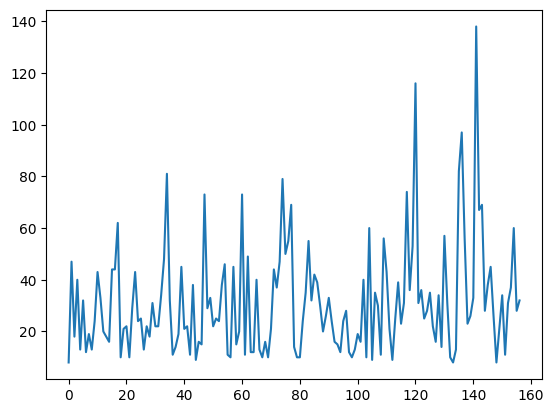

In [ ]:
car1 = Cart_Pole()
car1.qlearning()

In [ ]:
# mean = car1.test(show = True)
mean1 = car1.test()
print('mean reward = ', mean1)

mean reward =  68.65


mean reward =  29.35


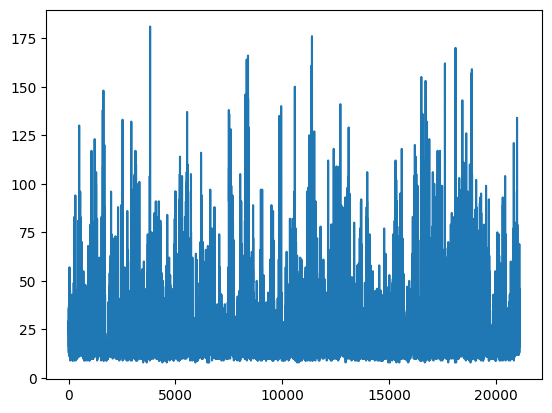

In [ ]:
car2 = Cart_Pole(steps = np.array([4, 10, 10, 10]), num_time_steps = 500000)
car2.qlearning()
mean2 = car2.test()
print('mean reward = ', mean2)

mean reward =  254.05


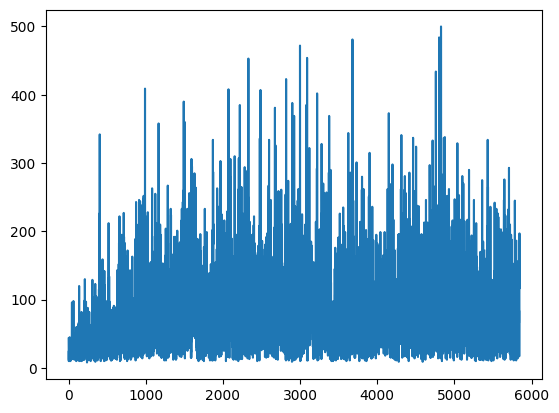

In [ ]:
car3 = Cart_Pole(steps = np.array([4, 10, 40, 10]), num_time_steps = 500000)
car3.qlearning()
mean3 = car3.test()
print('mean reward = ', mean3)

mean reward =  152.2


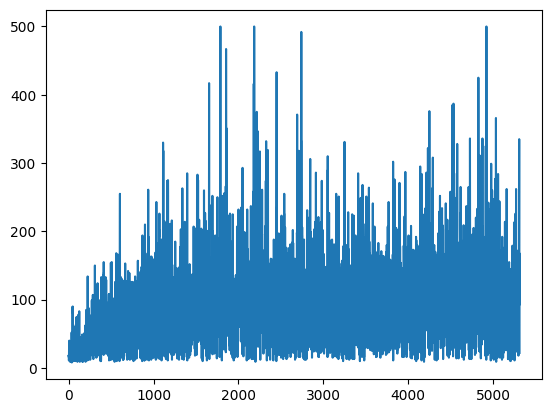

In [ ]:
car4 = Cart_Pole(steps = np.array([4, 10, 50, 10]), num_time_steps = 500000)
car4.qlearning()
mean4 = car4.test()
print('mean reward = ', mean4)

mean reward =  267.35


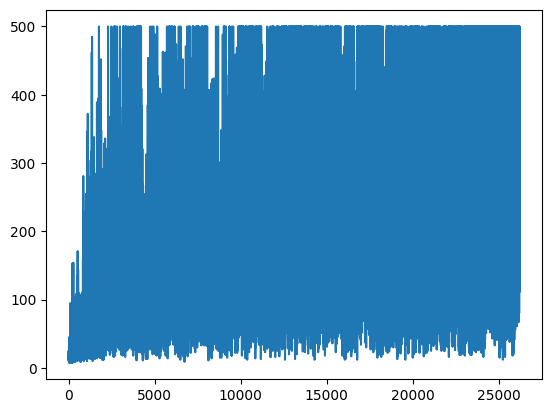

In [ ]:
car5 = Cart_Pole(steps = np.array([4, 20, 100, 20]), num_time_steps = 5000000)
car5.qlearning()
mean5 = car5.test()
print('mean reward = ', mean5)

mean reward =  186.45


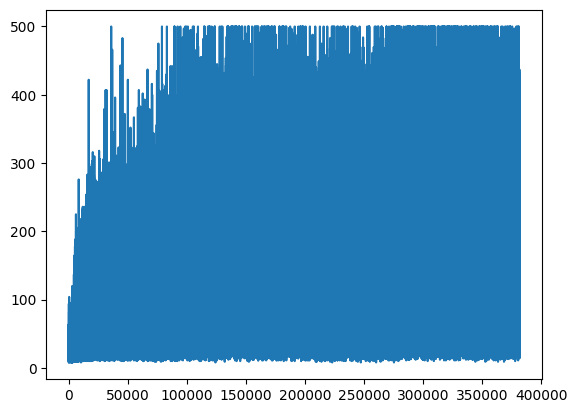

In [ ]:
car6 = Cart_Pole(steps = np.array([20, 20, 1000, 20]), num_time_steps = 50000000)
car6.qlearning()
mean6 = car6.test(episodes = 20)
print('mean reward = ', mean6)

In [ ]:
mean6 = car6.test(episodes = 10)
print('mean reward = ', mean6)

mean reward =  300.5
